# Small data analysis project using the 911 emergency call database, taken from Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info

<bound method DataFrame.info of               lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
663517  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...  19403.0   
663518  EAGLEVILLE RD &

In [4]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Some basic questions

#### What is the top 5 zips in the 911 calls?

In [5]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

#### What is the 5 main townships in the 911 calls?

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

#### How many unique title codes are there in this dataframe?

In [7]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [8]:
df['title'].nunique()

148

## Creating new resources

#### In the "title" column, there are "Reasons/Departments" specified before the title code ("EMS", "Fire" and "Traffic"). I'll use .apply() with a custom lambda expression to create a new column named "Reason" that contains this string value.

In [9]:
df['title'].iloc[0].split(':')

['EMS', ' BACK PAINS/INJURY']

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

#### What is the most common reason for a 911 call based on this new column?

In [11]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

#### Using the Seaborn library to create a countplot of 911 calls based on this new column

<AxesSubplot:xlabel='Reason', ylabel='count'>

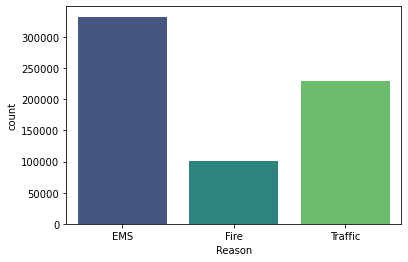

In [12]:
sns.countplot (x = 'Reason', data = df, palette = 'viridis')

#### Analysis of time information - what is the data type of the objects in the "timeStamp" column?

In [13]:
type(df['timeStamp'].iloc[0])

str

#### The column "timeStamps" is composed of strings. I will convert the string column into DateTime objects.

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
df['timeStamp'].iloc[0] #it works!

Timestamp('2015-12-10 17:10:52')

In [16]:
type(df['timeStamp'].iloc[0]) #it converts from a string to Pandas TimeStamp

pandas._libs.tslibs.timestamps.Timestamp

#### I will use the .apply() function to create three new columns ('Hour', 'Month' and 'Day of Week'), based on the "timeStamp" column.

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [18]:
print (df['Hour'])

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64


In [19]:
print (df['Month'])

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: Month, Length: 663522, dtype: int64


In [20]:
print (df['Day of Week'])

0         3
1         3
2         3
3         3
4         3
         ..
663517    2
663518    2
663519    2
663520    2
663521    2
Name: Day of Week, Length: 663522, dtype: int64


#### The day of the week is an integer from 0-6. I will use the .map() function through a dictionary to map the names of the real sequences to the days of the week

In [21]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [22]:
df['Day of Week'] = df['Day of Week'].map(dmap)
print ((df['Day of Week']))

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
663517    Wed
663518    Wed
663519    Wed
663520    Wed
663521    Wed
Name: Day of Week, Length: 663522, dtype: object


#### Using the Seaborn library to create a countplot of the "Day of Week" and "Month" columns

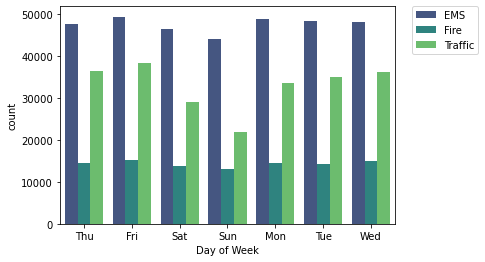

In [23]:
sns.countplot (x = 'Day of Week', data = df, hue = 'Reason', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

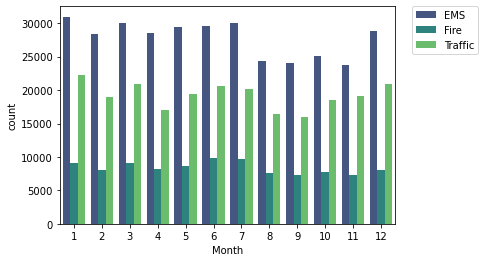

In [24]:
sns.countplot (x = 'Month', data = df, hue = 'Reason', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

#### There are some month columns missing from the chart plotted earlier. I will create a "byMonth" object to group the dataframe by the month column and use the count() method for aggregation.

In [25]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


#### Graphical indication of the number of calls per month

<AxesSubplot:xlabel='Month'>

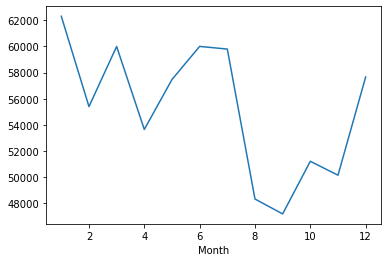

In [26]:
byMonth['twp'].plot()

#### Creating a linear model of the number of calls per month using Seaborn

In [28]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


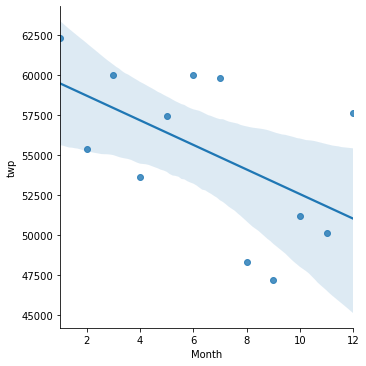

In [29]:
sns.lmplot(x = 'Month', y = 'twp', data=byMonth.reset_index()) 
#the shaded area indicates the model error (tends to increase in the area referring to months for which data are not available)

#### Creating a new 'Date' column with the date from the timeStamp column, and plotting a graph of call counts to the 911. Graphs will also be plotted according to each category of reason for calls.

In [30]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

<AxesSubplot:xlabel='Date'>

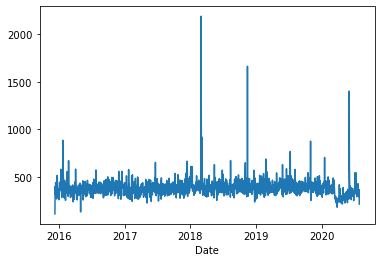

In [32]:
df.groupby('Date').count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

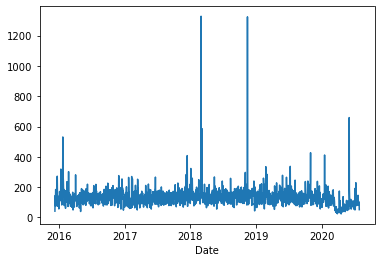

In [33]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

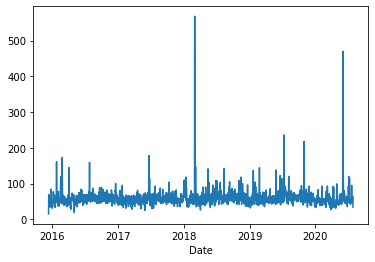

In [34]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

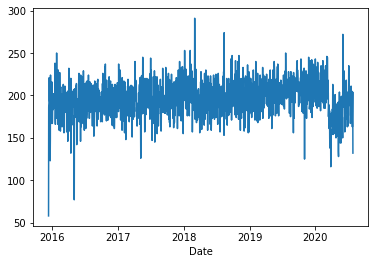

In [35]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

#### Creating different kinds of Heatmaps with Seaborn

##### First action should be to restructure the dataframe so that the columns become hours and the Index becomes days of the week.

In [42]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['twp'].unstack()

In [43]:
print(dayHour)

Hour           0     1     2     3     4     5     6     7     8     9   ...  \
Day of Week                                                              ...   
Fri          1981  1632  1449  1296  1338  1638  2663  4138  5017  5288  ...   
Mon          1893  1567  1366  1271  1336  1843  2675  4428  5502  5722  ...   
Sat          2442  2058  1879  1588  1449  1579  1879  2488  3457  4312  ...   
Sun          2423  2132  1938  1614  1468  1487  1725  2404  3001  3728  ...   
Thu          1731  1407  1424  1234  1292  1774  2814  4431  5296  5411  ...   
Tue          1719  1455  1322  1212  1245  1741  2782  4425  5633  5562  ...   
Wed          1662  1481  1258  1262  1128  1609  2667  4643  5465  5443  ...   

Hour           14    15    16    17    18    19    20    21    22    23  
Day of Week                                                              
Fri          6392  7038  7064  7112  5667  5055  4373  3912  3421  2828  
Mon          5713  6289  6341  6407  5440  4488  3823  32

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

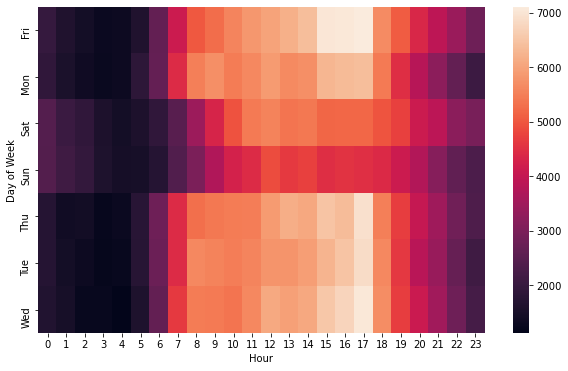

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(dayHour)
#heatmap

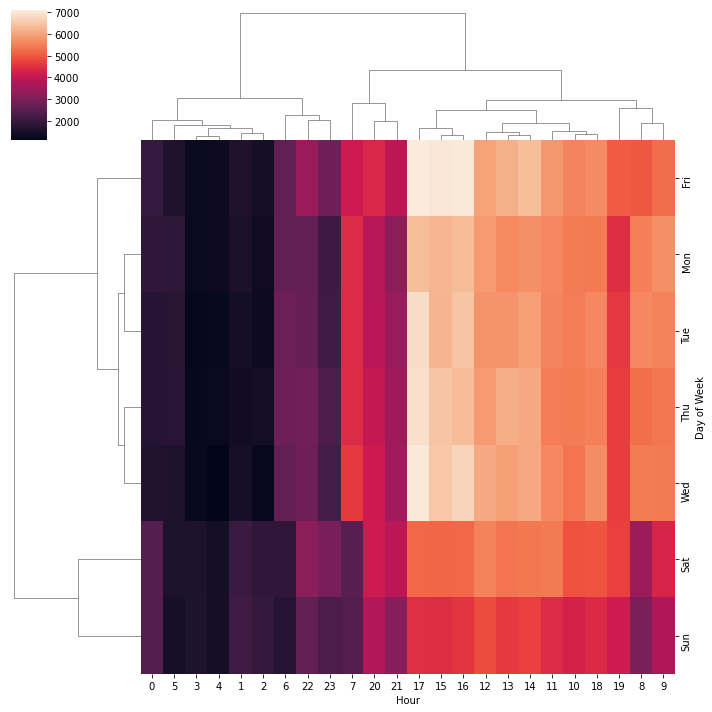

In [45]:
sns.clustermap(dayHour)
#clustermap

##### Showing month as column

In [46]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()

In [48]:
print(dayMonth)

Month          1     2      3     4     5     6     7     8     9     10  \
Day of Week                                                                
Fri          9305  8251  10932  7995  8899  9202  8677  7332  7689  6931   
Mon          8894  8743   8057  8407  7876  8510  9496  6853  6598  8068   
Sat          8467  7589   8043  7511  7221  8195  7745  6108  6563  6607   
Sun          7476  6450   6763  6862  6688  6832  7854  5272  5955  6315   
Thu          9053  7995   8849  7721  8736  9486  8376  7502  6952  7482   
Tue          9711  8083   8370  7561  9020  8340  9078  7289  6597  7946   
Wed          9406  8294   8987  7598  9034  9440  8576  7979  6842  7871   

Month          11    12  
Day of Week              
Fri          8379  9303  
Mon          6716  8489  
Sat          6767  8588  
Sun          5194  7162  
Thu          8353  8147  
Tue          7341  8301  
Wed          7407  7677  


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

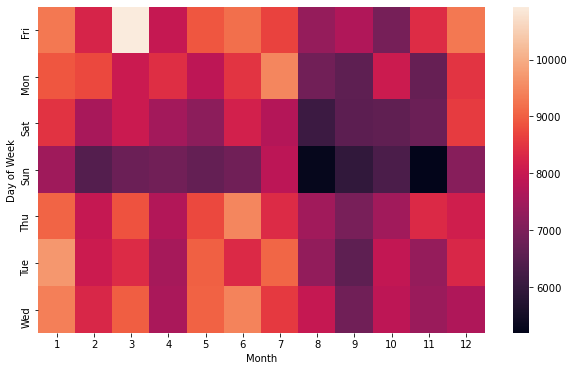

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth)
#heatmap

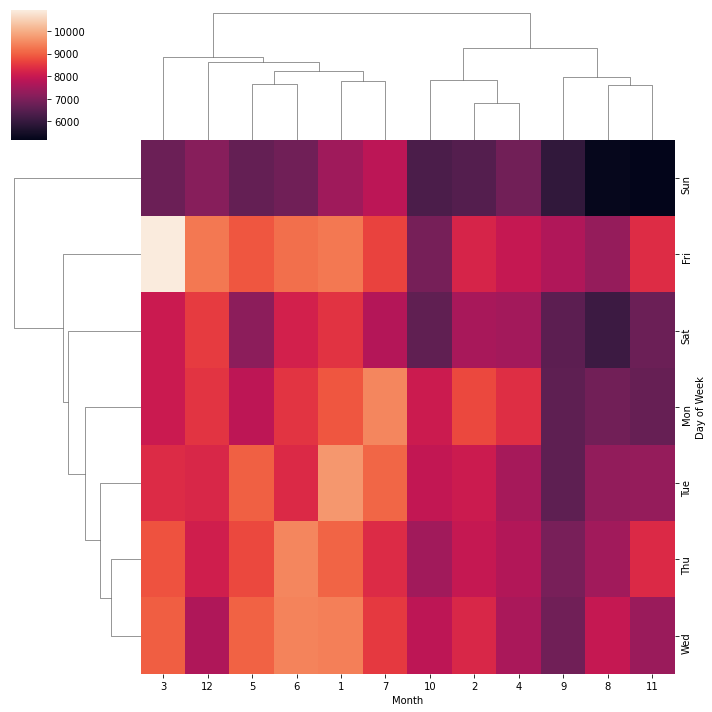

In [49]:
sns.clustermap(dayMonth)
#clustermap